In [15]:
import os
import pandas as pd
import numpy as np
import lingam
from lingam.utils import make_dot
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

inputs_path = os.path.join(os.getcwd(), 'data', 'inputs')

### VAR(1) with no shifts

$$
x_{1,t} = 0.2x_{1,t-1} + 0.7x_{3,t-1} + N(0, 1)\\ 
x_{2,t} = 0.2x_{2,t-1} + N(0, 1)\\ 
x_{3,t} = 0.7x_{1,t-1} + 0.2x_{2,t-1} + N(0, 1)\\ 
$$

<Axes: >

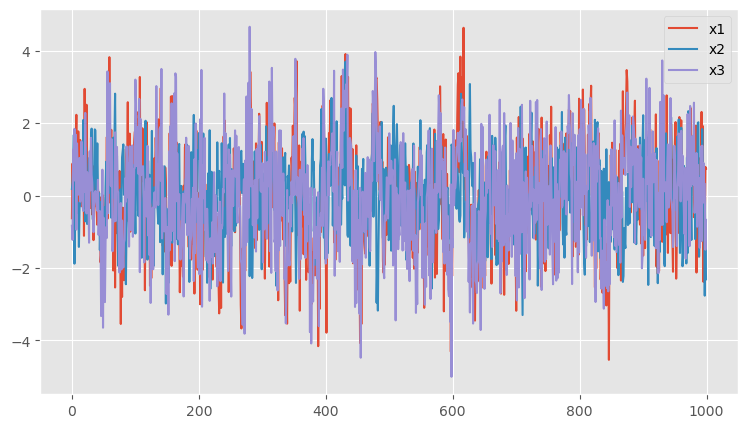

In [16]:
X0 = pd.read_csv(os.path.join(inputs_path, 'gaussian_var_large_n_sim0.csv'))

X0.plot(figsize=(9, 5))

In [21]:
shapiro_wilk_test = stats.shapiro(X0)
shapiro_wilk_test.pvalue

0.8436806797981262

In [22]:
p = 1

var_lingam = lingam.VARLiNGAM(lags=p)
var_lingam_fit = var_lingam.fit(X0)

print("Causal Order: \n\n", var_lingam_fit.causal_order_, "\n\n")
for i in range(p+1):
    print("B{}: \n\n".format(i), var_lingam_fit.adjacency_matrices_[i], "\n\n")

Causal Order: 

 [1, 2, 0] 


B0: 

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 


B1: 

 [[ 0.17997672  0.01957361  0.65994868]
 [ 0.02776101  0.21920295 -0.01487127]
 [ 0.70314642  0.19071908 -0.008307  ]] 




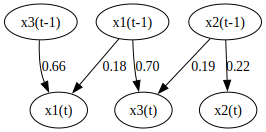

In [23]:
labels = []
for i in range(p+1):
    for colname in X0.columns:
        if i == 0:
            labels.append("{}(t)".format(colname, i))
        else:
            labels.append("{}(t-{})".format(colname, i))

make_dot(np.hstack(var_lingam_fit.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

### Variance Shifted VAR(1)

Enviroment $a$:
$$
x^a_{1,t} = 0.2x^a_{1,t-1} + 0.7x^a_{3,t-1} + N(0, 1)\\ 
x^a_{2,t} = 0.2x^a_{2,t-1} + N(0, 1)\\ 
x^a_{3,t} = 0.7x^a_{1,t-1} + 0.2x^a_{2,t-1} + N(0, 1)\\ 
$$

Enviroments $b$:
$$
x^b_{1,t} = 0.2x^b_{1,t-1} + 0.7x^b_{3,t-1} + N(0, 1)\\ 
x^b_{2,t} = 0.2x^b_{2,t-1} + N(0, 1)\\ 
x^b_{3,t} = 0.7x^b_{1,t-1} + 0.2x^a_{2,t-1} + N(0, 3)\\ 
$$

<Axes: >

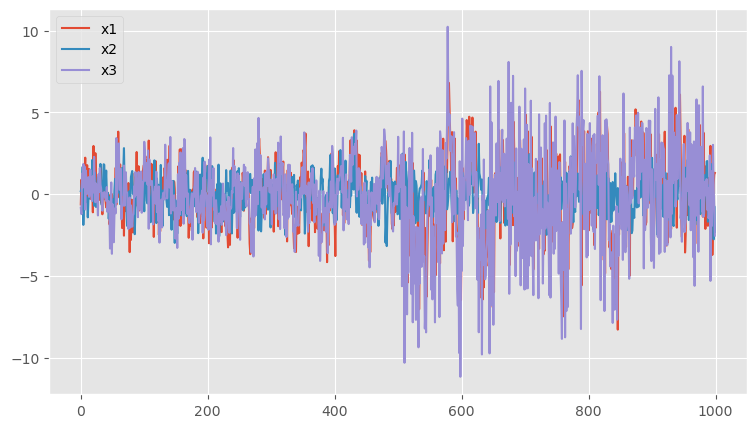

In [24]:
X1 = pd.read_csv(os.path.join(inputs_path, 'gaussian_var_large_n_sim1.csv'))

X1.plot(figsize=(9, 5))

In [25]:
shapiro_wilk_test = stats.shapiro(X1)
shapiro_wilk_test.pvalue

1.547426007970439e-26

In [26]:
p = 1

var_lingam1 = lingam.VARLiNGAM(lags=p)
var_lingam_fit1 = var_lingam1.fit(X1)

print("Causal Order: \n\n", var_lingam_fit1.causal_order_, "\n\n")
for i in range(p+1):
    print("B{}: \n\n".format(i), var_lingam_fit1.adjacency_matrices_[i], "\n\n")

Causal Order: 

 [1, 2, 0] 


B0: 

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 


B1: 

 [[ 0.1800404   0.01780126  0.68204901]
 [ 0.01726916  0.21952059 -0.00980338]
 [ 0.69686501  0.18481276 -0.01544614]] 




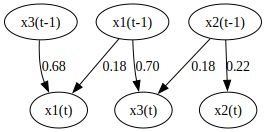

In [27]:
labels = []
for i in range(p+1):
    for colname in X1.columns:
        if i == 0:
            labels.append("{}(t)".format(colname, i))
        else:
            labels.append("{}(t-{})".format(colname, i))

make_dot(np.hstack(var_lingam_fit1.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

### Variance Shifted SVAR(1) (Model C of section 6 from Pfister et al. (2018))

Environment $a$:
$$
x^a_{1,t} = 0.7x^a_{3,t} + 0.5x^a_{2,t-1} + N(0, 1)\\ 
x^a_{2,t} = 0.2x^a_{2,t-1} + N(0, 1)\\ 
x^a_{3,t} = 0.2x^a_{2,t} + N(0, 1)\\ 
$$

Environment $b$:
$$
x^b_{1,t} = 0.7x^b_{3,t} + 0.5x^a_{2,t-1} + N(0, 1)\\ 
x^b_{2,t} = 0.2x^b_{2,t-1} + N(0, 1)\\ 
x^b_{3,t} = 0.2x^a_{2,t} + N(0, 3)\\ 
$$

<Axes: >

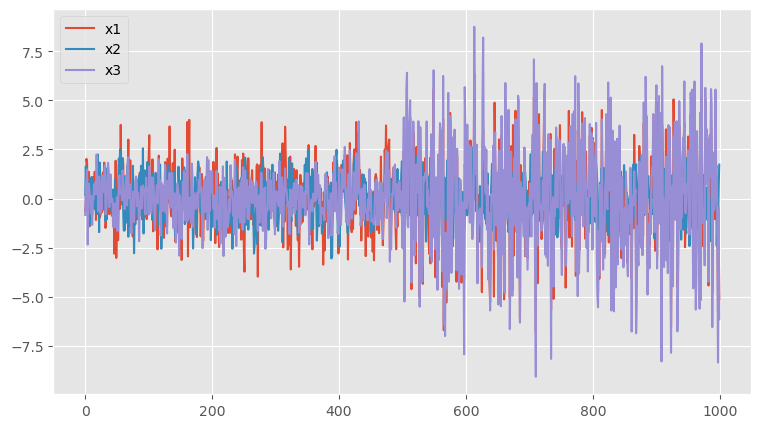

In [28]:
X2 = pd.read_csv(os.path.join(inputs_path, 'gaussian_svar_large_n_sim0.csv'))

X2.plot(figsize=(9, 5))

In [29]:
shapiro_wilk_test = stats.shapiro(X2)
shapiro_wilk_test.pvalue

1.0750388107769164e-25

In [30]:
p = 1

var_lingam2 = lingam.VARLiNGAM(lags=p)
var_lingam_fit2 = var_lingam2.fit(X2)

print("Causal Order: \n\n", var_lingam_fit2.causal_order_, "\n\n")
for i in range(p+1):
    print("B{}: \n\n".format(i), var_lingam_fit2.adjacency_matrices_[i], "\n\n")

Causal Order: 

 [1, 2, 0] 


B0: 

 [[0.         0.         0.71272936]
 [0.         0.         0.        ]
 [0.         0.188459   0.        ]] 


B1: 

 [[-0.01662978  0.55562619  0.00501955]
 [-0.01589875  0.144311    0.02251133]
 [-0.02300737  0.04927935  0.0240726 ]] 




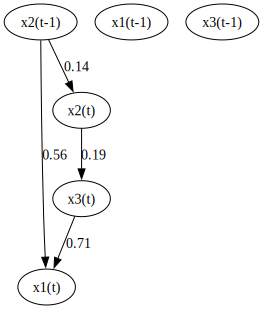

In [31]:
labels = []
for i in range(p+1):
    for colname in X2.columns:
        if i == 0:
            labels.append("{}(t)".format(colname, i))
        else:
            labels.append("{}(t-{})".format(colname, i))

make_dot(np.hstack(var_lingam_fit2.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)